
image 1/1 /projects/CV-practice/14.png: 480x640 14 persons, 10 cars, 1 bus, 1 truck, 4 traffic lights, 2 handbags, 67.4ms
Speed: 2.1ms preprocess, 67.4ms inference, 174.4ms postprocess per image at shape (1, 3, 480, 640)
image 1/1 /projects/CV-practice/14.png: 480x640 14 persons, 10 cars, 1 bus, 1 truck, 4 traffic lights, 2 handbags, 67.4ms
Speed: 2.1ms preprocess, 67.4ms inference, 174.4ms postprocess per image at shape (1, 3, 480, 640)
Detected objects using Ultralytics YOLOv8
Detected objects using Ultralytics YOLOv8


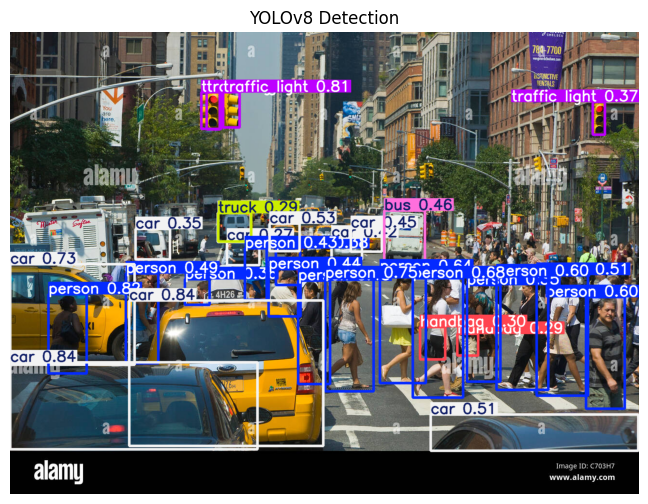

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load pretrained YOLOv8n model
model = YOLO('yolov8n.pt')  # or 'yolov8s.pt', 'yolov8m.pt', etc.

# Run detection
results = model('14.png')  # path to input image

# Visualize result
res_img = results[0].plot()

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
plt.title("YOLOv8 Detection")
plt.axis('off')
print("Detected objects using Ultralytics YOLOv8")
plt.show()


Visualized dense optical flow between two frames and original frame 1


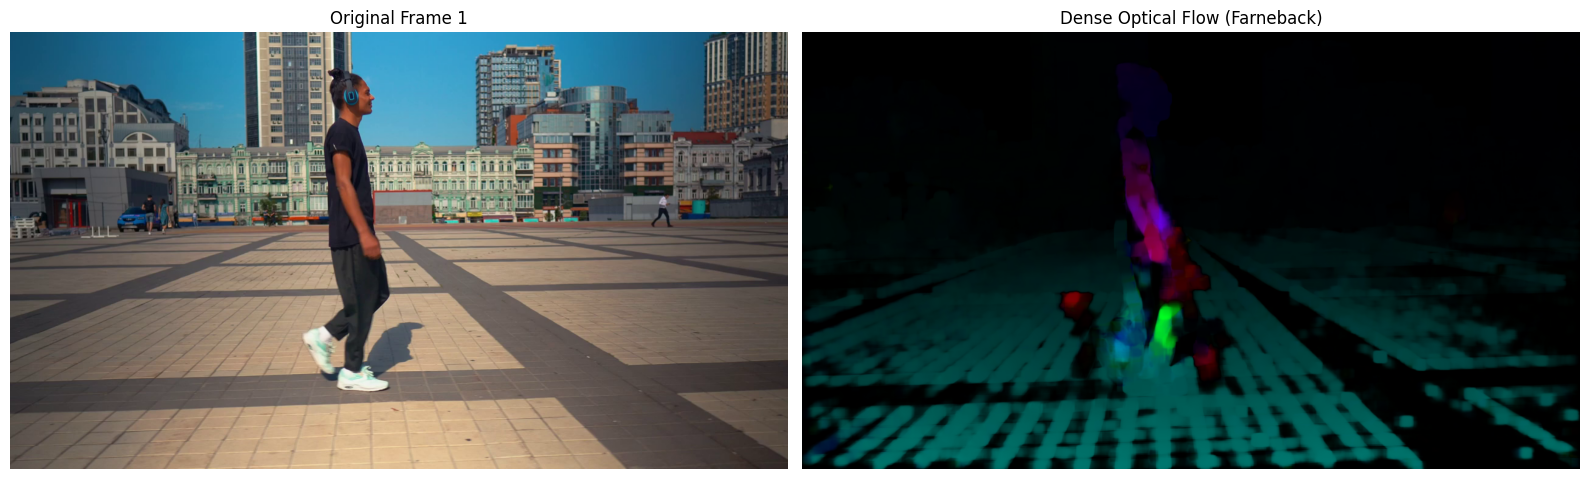

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extract and save 3 frames from test.mp4
cap = cv2.VideoCapture('test.mp4')
saved_frames = []
for i in range(3):
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fname = f'frame{i+1}.jpg'
    cv2.imwrite(fname, gray)
    saved_frames.append((frame, gray))
cap.release()

# Check if at least 2 frames were saved
if len(saved_frames) < 2:
    raise ValueError('Not enough frames extracted from test.mp4')

frame1_color, frame1 = saved_frames[0]
frame2_color, frame2 = saved_frames[1]

# Calculate dense optical flow using Farneback
flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Convert flow to HSV
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv = np.zeros((frame1.shape[0], frame1.shape[1], 3), dtype=np.uint8)
hsv[..., 0] = ang * 180 / np.pi / 2  # hue
hsv[..., 1] = 255                    # saturation
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)  # value
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(frame1_color, cv2.COLOR_BGR2RGB))
plt.title('Original Frame 1')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(flow_rgb)
plt.title('Dense Optical Flow (Farneback)')
plt.axis('off')
plt.tight_layout()
print("Visualized dense optical flow between two frames and original frame 1")
plt.show()